## Objective: To demonstrate Clustering of the IRIS dataset using K-means Clustering method.

#### The IRIS data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). The dataset describes four features from each sample: length and width of sepals and petals.

## Import Libraries

In [1]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

## Load the data

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

# The data has four features: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names
# The data has three unique values of the target variable species: 'setosa', 'versicolor', 'virginica'

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# Define target and features
X = iris.data
y = iris.target

## Exploaratory Data Analysis

Text(0, 0.5, 'Sepal Width')

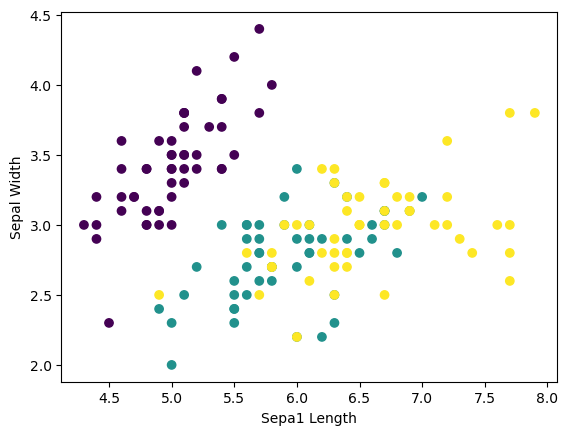

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

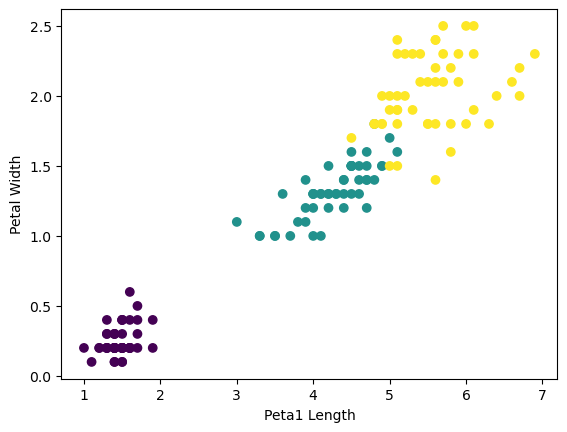

In [7]:
plt.scatter(X[:,2], X[:,3], c=y)
plt.xlabel('Peta1 Length')
plt.ylabel('Petal Width')

## Standardize the Data

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Build Kmeans algorithm to cluster the data

#### Determine the optimal number of clusters using the elbow method. 

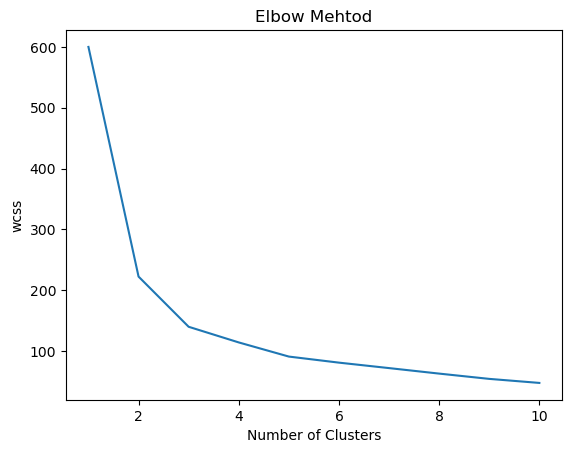

In [9]:
import warnings
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 37)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Mehtod')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
# As we can see in the above plot, 3 is the optimal number of clusters from the elbow method, so we will set k to 3.

In [12]:
# Fit the K-means model with the optimal number of clusters
kmeans_3 = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init = 10, random_state = 37)
kmeans_3.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=37)

In [13]:
# instantiate a variable for the centers
centers = kmeans_3.cluster_centers_
centers

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [14]:
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Comparison of original data with clustered results

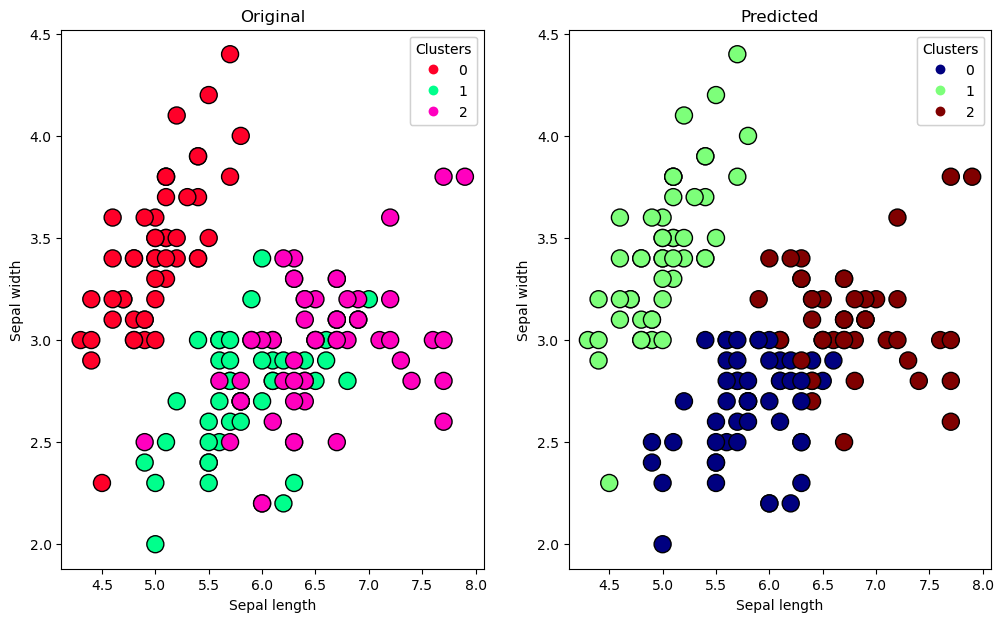

In [24]:
# Comparing the predicted cluster with the original cluster
kmean_labels = kmeans_3.labels_
fig, axes = plt.subplots(1, 2, figsize=(12,7))
sca_0 = axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
sca_1 = axes[1].scatter(X[:, 0], X[:, 1], c=kmean_labels, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[0].set_title('Original')
axes[1].set_title('Predicted')
legend_0 = axes[0].legend(*sca_0.legend_elements(), loc="upper right", title="Clusters")
axes[0].add_artist(legend_0)
legend_1 = axes[1].legend(*sca_1.legend_elements(), loc="upper right", title="Clusters")
axes[1].add_artist(legend_1)

We can see that cluster 0 is quite accurate while the ther two clusters (1 & 2) are not as easily distinguished.